# DAY 4
## 과제 1
+ 다음의 Series 데이터를 아래와 같이 변경해보세요
    + 값이 2인 경우는 20, NaN(None) 은 5로 변경해보세요. 이 때 list를 사용해서 변경해보세요
    + 값이 3인 경우는 30, Nan(None) 은 10으로 변경해보세요. 이 때 dict를 사용해서 변경해보세요

In [2]:
import pandas as pd
import numpy as np
ser = pd.Series([1, 2, 3, 4, np.nan])

In [7]:
ser

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64


(1) 결측값, 실측값을 다른 값으로 교체하기:  <span style="color:blue">replace(old_val, new_val)</span>

In [8]:
#리스트 이용하기
ser.replace([2, np.nan], [20, 5])

0     1.0
1    20.0
2     3.0
3     4.0
4     5.0
dtype: float64

(3) mapping dict 로 원래 값, 교체할 값 매핑 : replace({old1 : new1, old2: new2})

In [9]:
#딕셔너리 이용하기
ser.replace({2:20, np.nan:5})

0     1.0
1    20.0
2     3.0
3     4.0
4     5.0
dtype: float64

- 다음의 dataFrame 데이터를 아래와 같이 변경해보세요
    - C1 컬럼의 a_old 값은 a_new의 값으로 변경해보세요
    - C3 칼럼의 np.nan 값은 C3 컬럼의 10으로 변경해보세요

In [10]:
df = pd.DataFrame({'C1': ['a_old', 'b', 'c', 'd', 'e'],
                   'C2': [1, 2, 3, 4, 5],
                   'C3': [6, 7, 8, 9, np.nan]})

In [11]:
df

,C1,C2,C3
0,a_old,1,6.0
1,b,2,7.0
2,c,3,8.0
3,d,4,9.0
4,e,5,NaN


In [12]:
df.replace({'C1':'a_old'}, {'C1': 'a_new'})

,C1,C2,C3
0,a_new,1,6.0
1,b,2,7.0
2,c,3,8.0
3,d,4,9.0
4,e,5,NaN


In [14]:
df.replace({'C3': np.nan}, {'C3': 10})

,C1,C2,C3
0,a_old,1,6.0
1,b,2,7.0
2,c,3,8.0
3,d,4,9.0
4,e,5,10.0


## 과제 2
+ 다음의 데이터를 사용하여 아래와 같이 변경해보세요
    + key1, key2의 중복 여부를 확인해보세요. 중복 데이터가 있을 때 첫 번째 값을 True로 반환해보세요
    + key1, key2의 중복 여부를 확인해보세요. 중복 데이터가 있을 때 마지막 값을 True로 반환해보세요
    + 중복값 처리(unique한 1개의 key만 남기고 나머지 중복은 제거)를 해보세요
    + 이 때 중복값 중 첫 번째 값만 남기도록 해보세요
    + 중복값 처리(unique한 1개의 key만 남기고 나머지 중복은 제거)
    + 이 때 중복값 중 마지막 값만 남기도록 해보세요

In [15]:
data = {'key1': ['a', 'b', 'b', 'c', 'c'],
        'key2': ['v', 'w', 'w', 'x', 'y'],
        'col': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

In [16]:
df

,key1,key2,col
0,a,v,1
1,b,w,2
2,b,w,3
3,c,x,4
4,c,y,5


In [21]:
#key1, key2 사이의 중복여부 확인, 첫번째 값 true
df.duplicated(['key1', 'key2'], keep = 'first')

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [23]:
#key1, key2 사이의 중복여부 확인, 마지막 값 값 true
df.duplicated(['key1', 'key2'], keep = 'last')

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [28]:
#중복제거하기 _ first
df.drop_duplicates(['key1'], keep = 'first')

,key1,key2,col
0,a,v,1
1,b,w,2
3,c,x,4


In [29]:
#중복제거하기 _ last
df.drop_duplicates(['key1'], keep = 'last')

,key1,key2,col
0,a,v,1
2,b,w,3
4,c,y,5


## 과제 3
다음의 데이터를 사용하여 아래와 같이 변경해보세요
- A, B, C 컬럼의 유일한 값을 반환해보세요(오름차순 예시)
- A, B, C 컬럼별 유일값에 대한 개수를 반환해보세요
- 이 때, 결측값도 포함하여 반환하여야 합니다.
- A, B, C 컬럼별 유일값에 대한 개수의 상대적 비율(A, B, C의 개수 / 전체 개수)을 반환해보세요

In [30]:
df = pd.DataFrame({'A': ['A1', 'A1', 'A2', 'A2', 'A3', 'A3'],
                   'B': ['B1', 'B1', 'B1', 'B1', 'B2', np.nan],
                   'C': [1, 1, 3, 4, 4, 4]})

In [31]:
df

,A,B,C
0,A1,B1,1
1,A1,B1,1
2,A2,B1,3
3,A2,B1,4
4,A3,B2,4
5,A3,NaN,4


In [39]:
print(" 'A' 의 유일한 값:", df['A'].unique())
print(" 'B' 의 유일한 값:", df['B'].unique())
print(" 'C' 의 유일한 값:", df['C'].unique())

 'A' 의 유일한 값: ['A1' 'A2' 'A3']
 'B' 의 유일한 값: ['B1' 'B2' nan]
 'C' 의 유일한 값: [1 3 4]


(2) 유일한 값별로 개수 세기 : pd.Series.value_counts()

In [44]:
print(" 'A' 의 유일한 값 개수: \n", df['A'].value_counts())
print(" 'B' 의 유일한 값 개수: \n", df['B'].value_counts())
print(" 'C' 의 유일한 값 개수: \n", df['C'].value_counts())

 'A' 의 유일한 값 개수: 
 A1    2
A2    2
A3    2
Name: A, dtype: int64
 'B' 의 유일한 값 개수: 
 B1    4
B2    1
Name: B, dtype: int64
 'C' 의 유일한 값 개수: 
 4    3
1    2
3    1
Name: C, dtype: int64


A, B, C 컬럼별 유일값에 대한 개수의 상대적 비율(A, B, C의 개수 / 전체 개수)을 반환해보세요

In [45]:
print(" 'A' 의 유일한 값 비율: \n", df['A'].value_counts(normalize=True))
print(" 'B' 의 유일한 값 비율: \n", df['B'].value_counts(normalize=True))
print(" 'C' 의 유일한 값 비율: \n", df['C'].value_counts(normalize=True))

 'A' 의 유일한 값 비율: 
 A1    0.333333
A2    0.333333
A3    0.333333
Name: A, dtype: float64
 'B' 의 유일한 값 비율: 
 B1    0.8
B2    0.2
Name: B, dtype: float64
 'C' 의 유일한 값 비율: 
 4    0.500000
1    0.333333
3    0.166667
Name: C, dtype: float64


## 과제 4
- 다음의 데이터를 아래와 같은 제약조건으로 표준화를 진행해보세요
- numpy를 이용하여 표준화를 진행해보세요(z = (x - mean() / std())
- scipy.stats 를 이용하여 표준화를 진행해보세요
- sklearn.preprocessing을 이용하여 포준화를 진행해보세요

In [46]:
import numpy as np
data = np.random.randint(30, size=(6, 5))

In [47]:
data

array([[ 6, 13, 29, 25, 21],
       [ 6, 21, 22, 27, 18],
       [10, 17,  7,  6,  8],
       [12, 24,  6, 17, 29],
       [28, 27,  3, 21, 20],
       [27, 11, 21,  7, 24]])

In [57]:
#numpy 표준화
data_std_by_np = (data - np.mean(data, axis = 0)) / np.std(data, axis=0)
data_std_by_np

array([[-0.95920728, -1.01845793,  1.47142971,  0.95838568,  0.15617376],
       [-0.95920728,  0.37828438,  0.7528245 ,  1.2030799 , -0.31234752],
       [-0.52484927, -0.32008678, -0.7870438 , -1.36620938, -1.87408514],
       [-0.30767026,  0.90206274, -0.88970168, -0.02039118,  1.40556386],
       [ 1.4297618 ,  1.42584111, -1.19767534,  0.46899725,  0.        ],
       [ 1.3211723 , -1.36764351,  0.65016662, -1.24386227,  0.62469505]])

In [53]:
# scipy.stats
import scipy.stats as ss

In [54]:
data_std_by_ss = ss.zscore(data)
data_std_by_ss

array([[-0.95920728, -1.01845793,  1.47142971,  0.95838568,  0.15617376],
       [-0.95920728,  0.37828438,  0.7528245 ,  1.2030799 , -0.31234752],
       [-0.52484927, -0.32008678, -0.7870438 , -1.36620938, -1.87408514],
       [-0.30767026,  0.90206274, -0.88970168, -0.02039118,  1.40556386],
       [ 1.4297618 ,  1.42584111, -1.19767534,  0.46899725,  0.        ],
       [ 1.3211723 , -1.36764351,  0.65016662, -1.24386227,  0.62469505]])

In [58]:
# sklearn 표준화
from sklearn.preprocessing import StandardScaler
data_std_by_skl = StandardScaler().fit_transform(data)
data_std_by_skl

array([[-0.95920728, -1.01845793,  1.47142971,  0.95838568,  0.15617376],
       [-0.95920728,  0.37828438,  0.7528245 ,  1.2030799 , -0.31234752],
       [-0.52484927, -0.32008678, -0.7870438 , -1.36620938, -1.87408514],
       [-0.30767026,  0.90206274, -0.88970168, -0.02039118,  1.40556386],
       [ 1.4297618 ,  1.42584111, -1.19767534,  0.46899725,  0.        ],
       [ 1.3211723 , -1.36764351,  0.65016662, -1.24386227,  0.62469505]])

## 과제 5
- 다음의 데이터를 로드하는데, 다음의 조건을 충족시켜 주세요
- numpy 내 숫자 소수점은 둘째자리까지 표현하도록 옵션을 수정하세요
- np.random. 함수 수행시, 고정되도록 옵션을 수정하세요

In [90]:
mu, sigma = 10, 2
import random
np.random.seed(1)
x = mu + sigma * np.random.randn(100)
x[98:100] = 100

In [91]:
data = np.round(x, 2)
data

array([ 13.25,   8.78,   8.94,   7.85,  11.73,   5.4 ,  13.49,   8.48,
        10.64,   9.5 ,  12.92,   5.88,   9.36,   9.23,  12.27,   7.8 ,
         9.66,   8.24,  10.08,  11.17,   7.8 ,  12.29,  11.8 ,  11.  ,
        11.8 ,   8.63,   9.75,   8.13,   9.46,  11.06,   8.62,   9.21,
         8.63,   8.31,   8.66,   9.97,   7.77,  10.47,  13.32,  11.48,
         9.62,   8.22,   8.51,  13.38,  10.1 ,   8.73,  10.38,  14.2 ,
        10.24,  11.23,  10.6 ,   9.3 ,   7.71,   9.3 ,   9.58,  11.17,
        11.68,  11.86,  10.57,  11.77,   8.49,  12.51,  11.03,   9.4 ,
        10.98,   9.85,  12.26,  13.04,  14.37,   7.21,   7.11,   8.99,
        10.32,  11.75,  10.63,   5.96,   9.39,  11.66,  10.46,  11.52,
         9.56,   9.6 ,  10.37,  10.82,  10.4 ,  10.24,   8.66,  10.76,
        10.24,  12.26,  12.4 ,  10.37,   9.25,   8.72,  10.85,  10.15,
         9.31,  10.09, 100.  , 100.  ])

- 다음의 데이터를 편성하고, 이 데이터를 표준정규분포 기반으로 표준화를 수행하세요
- 표준화된 데이터 중, 이상치를 제거하고 histogram을 그려보세요
- 위의 초기 df 데이터를 가지고 RobustScaler 를 사용하여 데이터를 histogram 으로 확인해보고, 기존 표준화된 데이터와 비교해보세요

In [99]:
data_std = StandardScaler().fit_transform(data.reshape(-1, 1))

In [100]:
data_std

array([[ 1.04711288e-01],
       [-2.47107305e-01],
       [-2.34514246e-01],
       [-3.20304462e-01],
       [-1.49227752e-02],
       [-5.13135682e-01],
       [ 1.23600877e-01],
       [-2.70719291e-01],
       [-1.00712991e-01],
       [-1.90438538e-01],
       [ 7.87381029e-02],
       [-4.75356504e-01],
       [-2.01457465e-01],
       [-2.11689326e-01],
       [ 2.75787998e-02],
       [-3.24239793e-01],
       [-1.77845479e-01],
       [-2.89608880e-01],
       [-1.44788699e-01],
       [-5.89984826e-02],
       [-3.24239793e-01],
       [ 2.91529322e-02],
       [-9.41331179e-03],
       [-7.23786080e-02],
       [-9.41331179e-03],
       [-2.58913298e-01],
       [-1.70761883e-01],
       [-2.98266608e-01],
       [-1.93586803e-01],
       [-6.76562108e-02],
       [-2.59700364e-01],
       [-2.13263458e-01],
       [-2.58913298e-01],
       [-2.84099417e-01],
       [-2.56552100e-01],
       [-1.53446427e-01],
       [-3.26600992e-01],
       [-1.14093117e-01],
       [ 1.1

In [104]:
import matplotlib.pyplot as plt

(array([98.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.51313568,  0.23142895,  0.97599357,  1.7205582 ,  2.46512283,
         3.20968746,  3.95425209,  4.69881671,  5.44338134,  6.18794597,
         6.9325106 ]),
 <BarContainer object of 10 artists>)

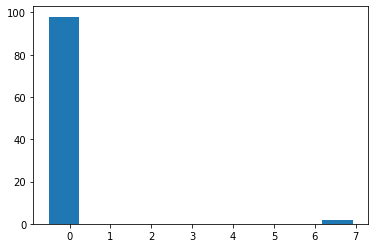

In [105]:
plt.hist(data_std)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        31., 50., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]),
 <BarContainer object of 29 artists>)

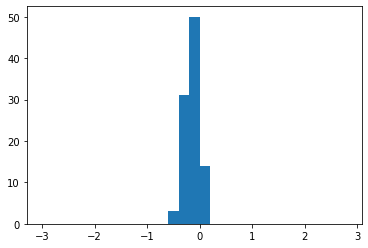

In [108]:
# 표준화된 데이터 중, 이상치를 제거하고 histogram을 그려보세요
x_StandardScaler_zoonin = data_std[data_std < 5]
plt.hist(x_StandardScaler_zoonin, bins = np.arange(-3, 3, 0.2))

In [112]:
from sklearn.preprocessing import RobustScaler

In [114]:
# 위의 초기 df 데이터를 가지고 RobustScaler 를 사용하여 데이터를 histogram 으로 확인해보고, 
# 기존 표준화된 데이터와 비교해보세요

data_rob = RobustScaler().fit_transform(data.reshape(-1,1))
data_rob

array([[ 1.17953668e+00],
       [-5.46332046e-01],
       [-4.84555985e-01],
       [-9.05405405e-01],
       [ 5.92664093e-01],
       [-1.85135135e+00],
       [ 1.27220077e+00],
       [-6.62162162e-01],
       [ 1.71814672e-01],
       [-2.68339768e-01],
       [ 1.05212355e+00],
       [-1.66602317e+00],
       [-3.22393822e-01],
       [-3.72586873e-01],
       [ 8.01158301e-01],
       [-9.24710425e-01],
       [-2.06563707e-01],
       [-7.54826255e-01],
       [-4.44015444e-02],
       [ 3.76447876e-01],
       [-9.24710425e-01],
       [ 8.08880309e-01],
       [ 6.19691120e-01],
       [ 3.10810811e-01],
       [ 6.19691120e-01],
       [-6.04247104e-01],
       [-1.71814672e-01],
       [-7.97297297e-01],
       [-2.83783784e-01],
       [ 3.33976834e-01],
       [-6.08108108e-01],
       [-3.80308880e-01],
       [-6.04247104e-01],
       [-7.27799228e-01],
       [-5.92664093e-01],
       [-8.68725869e-02],
       [-9.36293436e-01],
       [ 1.06177606e-01],
       [ 1.2

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  2.,  5., 10.,  7.,
        16.,  7., 14., 10.,  5.,  7.,  4.,  3.,  3.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]),
 <BarContainer object of 29 artists>)

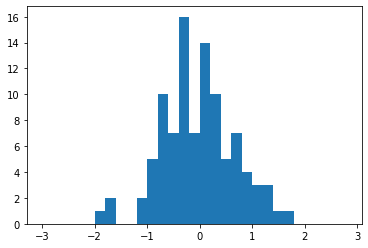

In [117]:
x_RobustScaler_zoonin = data_rob[data_rob < 5]
plt.hist(x_RobustScaler_zoonin, bins = np.arange(-3, 3, 0.2))